<a href="https://colab.research.google.com/github/gupta-keshav/EDA_World_Happiness_Report/blob/master/essentials_of_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.
> In this notebook, I'll try to tackle the most obvious questions that come to one's mind after looking at the data, that why is there such happiness score difference between different regions. I'll start by finding out factors on which regional happiness depends and then we'll dwell deeper to find answers to questions like Why different region's happiness depends on different factors and how are these factors interdependent.

In [0]:
#for manipulating dataframes
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [0]:
d_2015 = pd.read_csv('../input/world-happiness/2015.csv')
d_2016 = pd.read_csv('../input/world-happiness/2016.csv')
d_2017 = pd.read_csv('../input/world-happiness/2017.csv')

**Regional Happiness Differences**

Now I'll like to illustrate the regional happiness differences I talked about in the introduction.

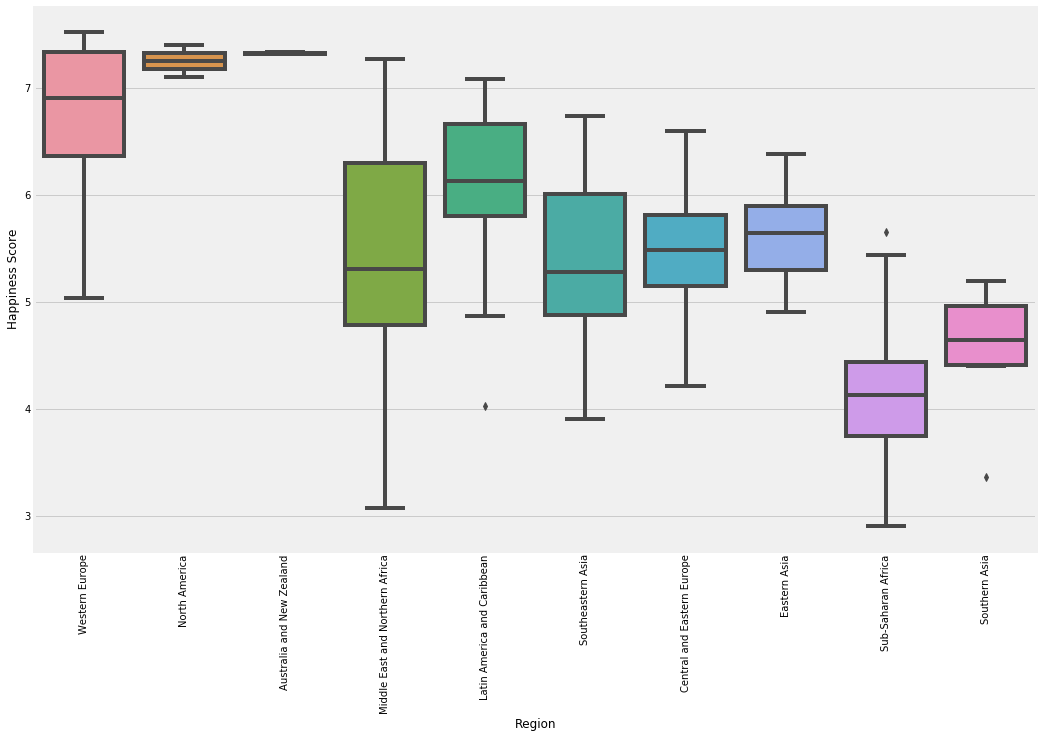

In [0]:
plt.rcParams['figure.figsize'] = (16, 10)
sns.boxplot(d_2016['Region'], d_2016['Happiness Score'])
plt.xticks(rotation = 90)
plt.show()

It can be observed that there are some regions like Western Europe, North America, Australia and New Zealand which sit on the top end of happiness score and regions like Sub-Saharan Africa and Southern Asia which sit on lower half of Happiness Score.

**Important Factors For happiness**

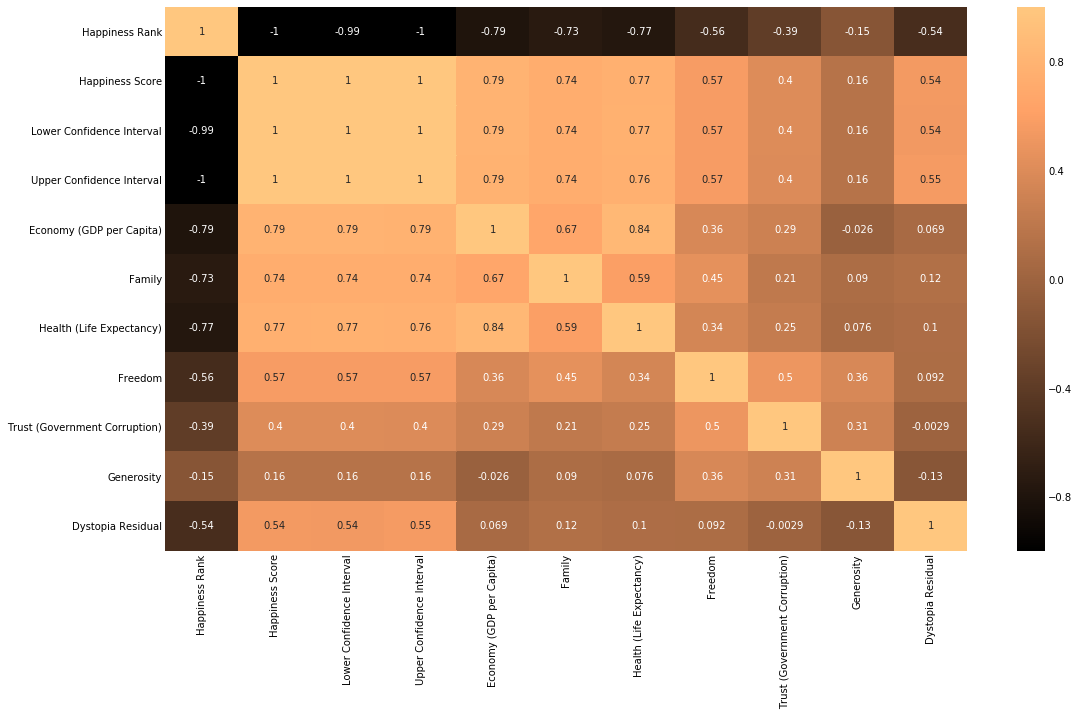

In [0]:
sns.heatmap(d_2016.corr(), cmap = 'copper', annot = True)
plt.show()

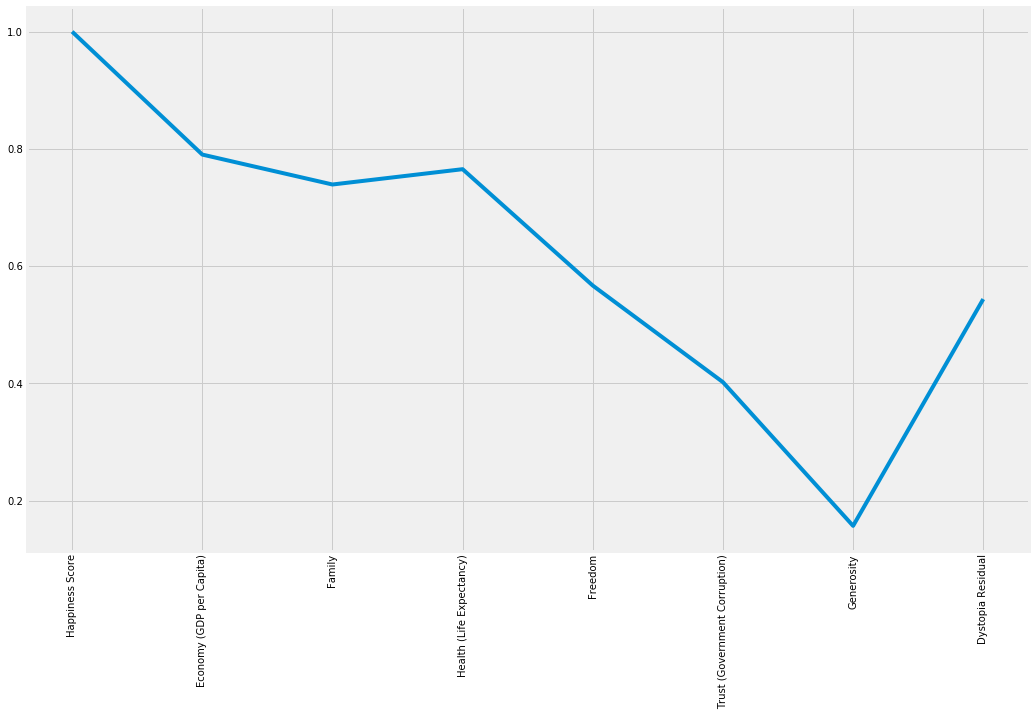

In [0]:
D = d_2016.drop(['Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1)
d = D.corr()['Happiness Score']
d = pd.DataFrame(d)
row_names = d.index
row_names = pd.DataFrame(row_names)
plt.plot(row_names[0], d['Happiness Score'])
plt.xticks(rotation = 90)
plt.show()

It can be observed that there are some regions like Western Europe, North America, Australia, and New Zealand that sit on the top end of happiness score and have high median Happiness Score compared to regions like Sub-Saharan Africa and Southern Asia that sit on the lower half of Happiness Score.

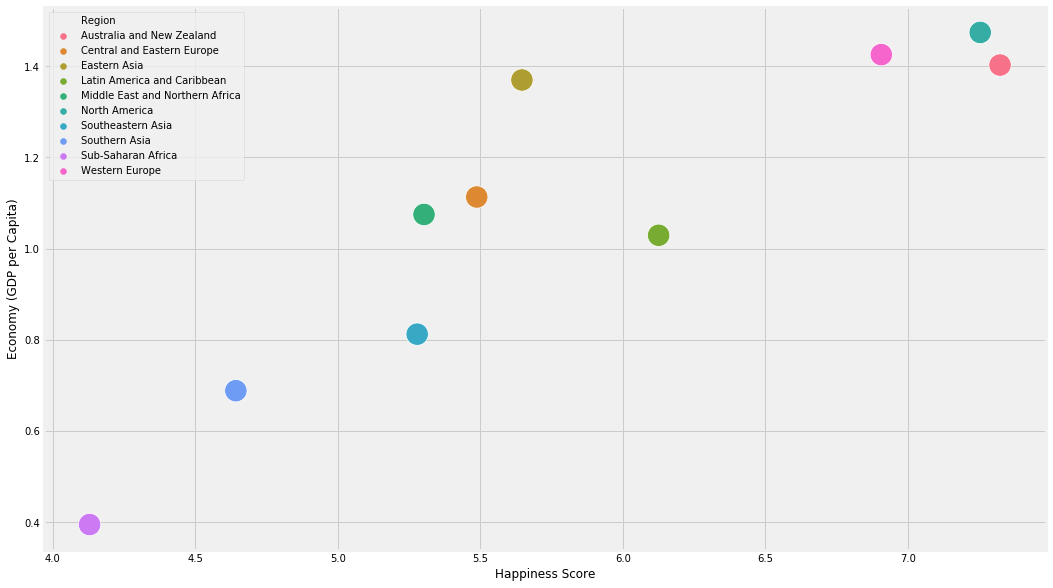

In [0]:
d = d_2016.groupby('Region')['Happiness Score', 'Economy (GDP per Capita)', 'Region'].median()
sns.scatterplot(d['Happiness Score'], d['Economy (GDP per Capita)'], hue = d.index, s = 500)
plt.show()

From the above graph, a linear relation between Happiness Score and Economy is observed which means that the regions that have low GDP have low Happiness Score( example Sub Saharan region shown in purple) and the regions with high GDP have high Happiness Score (example Western Europe shown in pink). The linear relationship observed suggests that the happiness scores difference observed might be because of differences in the economic conditions of the regions.

**High Happiness Region:**


    Now I'll try to analyze some regions that have high happiness score to see what factors affect the happiness score in such regions.

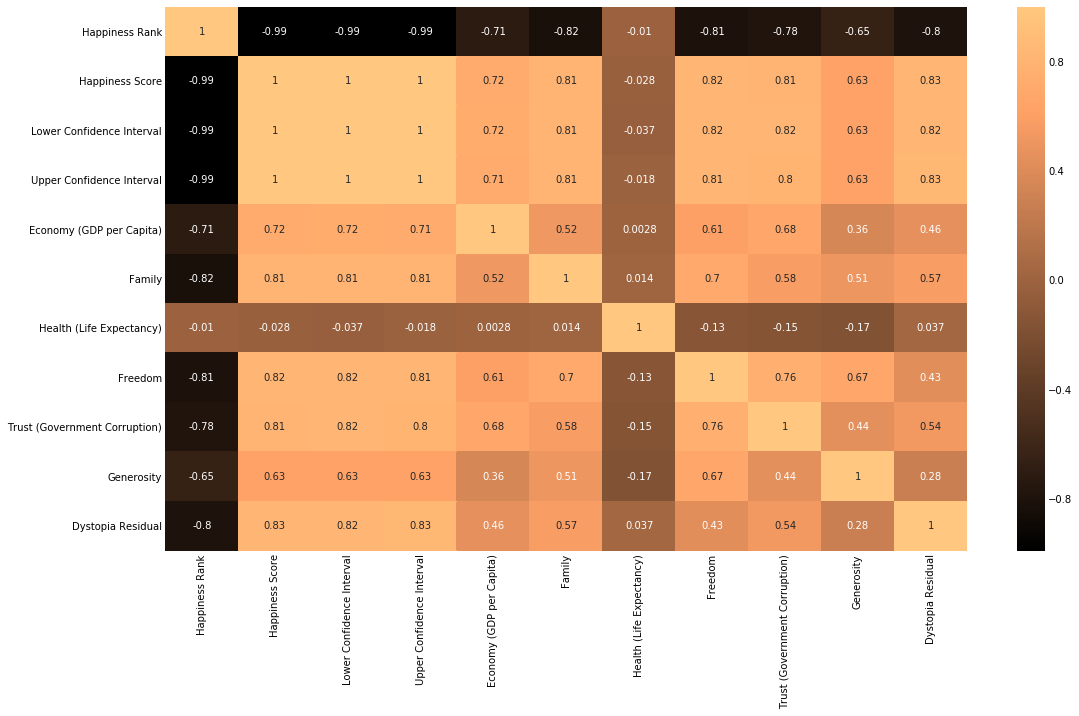

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Western Europe']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'North America']
d = pd.concat([d1, d2], axis = 0)
sns.heatmap(d.corr(), cmap = 'copper', annot = True)
plt.show()

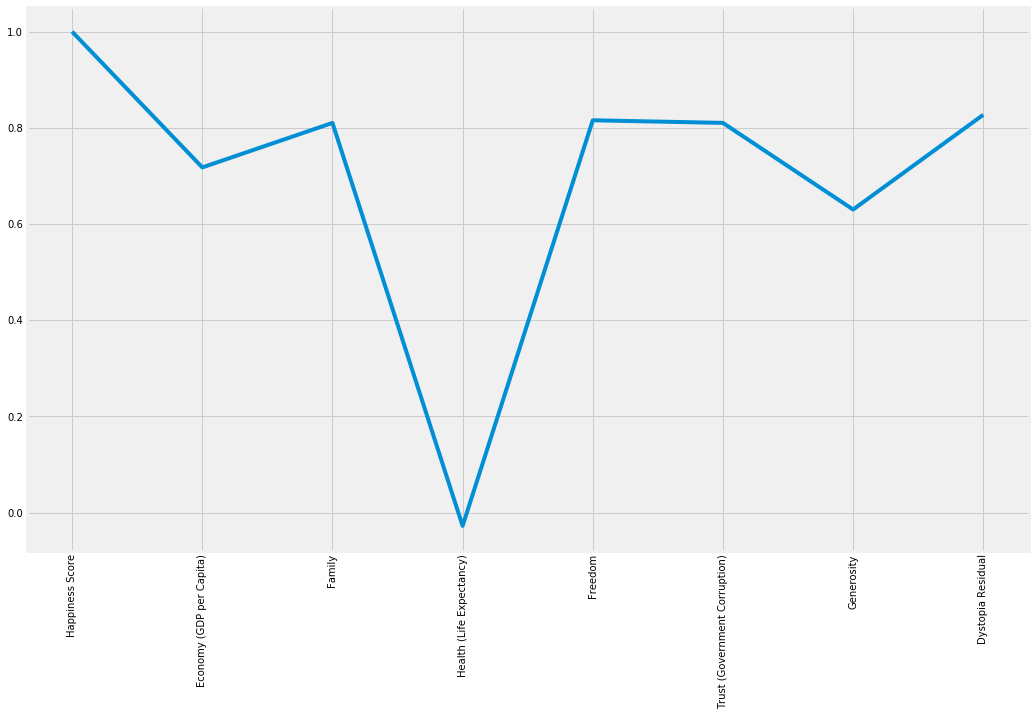

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Western Europe']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'North America']
new_data = pd.concat([d1, d2], axis = 0)
D = new_data.drop(['Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1)
d = D.corr()['Happiness Score']
d = pd.DataFrame(d)
row_names = d.index
row_names = pd.DataFrame(row_names)
plt.plot(row_names[0], d['Happiness Score'])
plt.xticks(rotation = 90)
plt.show()

The thing that stands out the most from the above graphs is the extremely low correlation between Life Expectancy and Happiness Score. Other than that, an increase in correlation between factors such as Family Satisfaction, Freedom, and Government Corruption is observed.

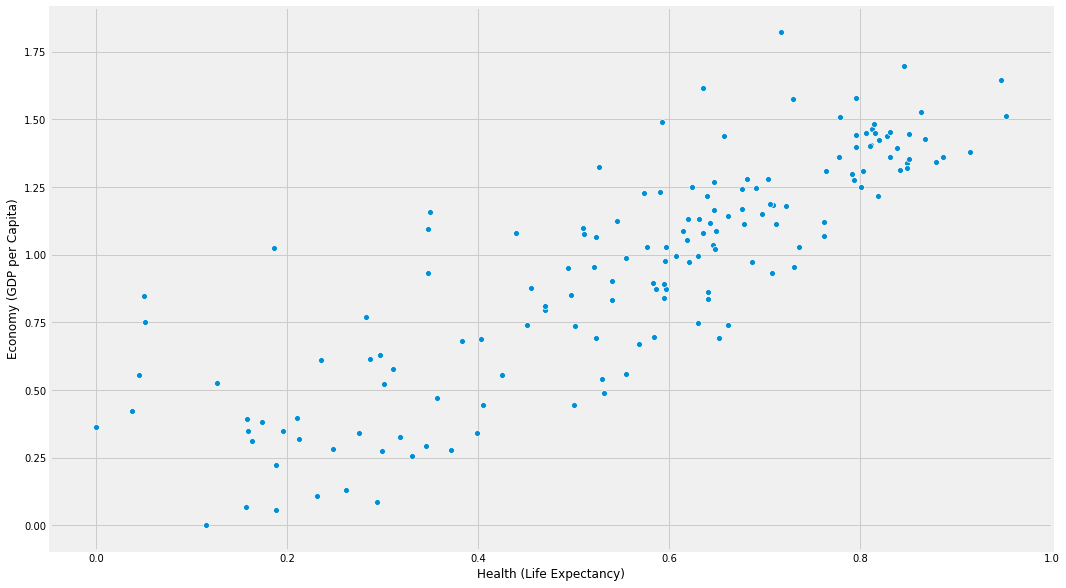

In [0]:
sns.scatterplot(d_2016['Health (Life Expectancy)'], d_2016['Economy (GDP per Capita)'])
plt.show()

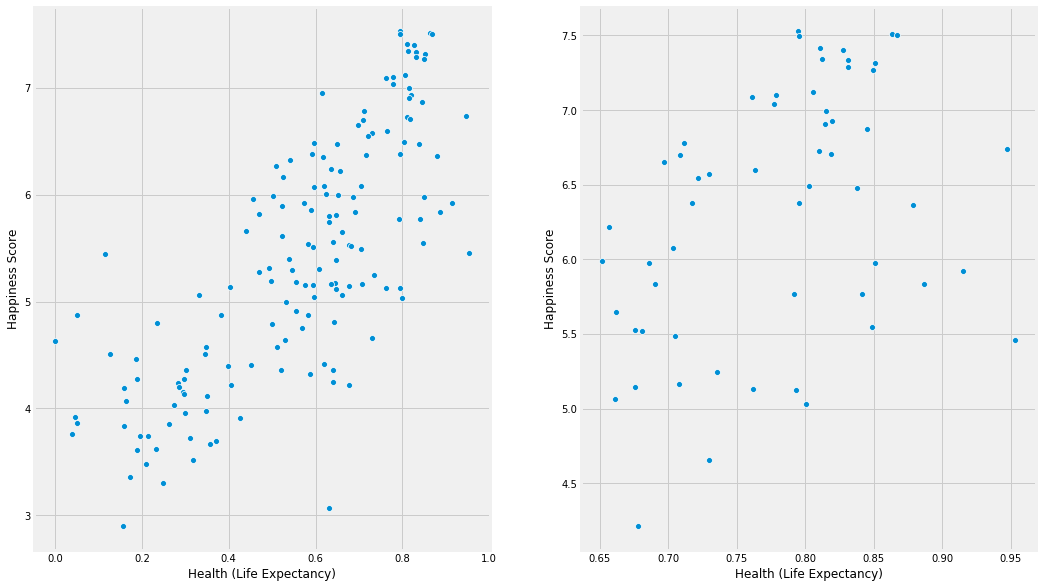

In [0]:
plt.subplot(1, 2, 1)
sns.scatterplot(d_2016['Health (Life Expectancy)'],  d_2016['Happiness Score'])
plt.subplot(1, 2, 2)
d = d_2016.loc[lambda d_2016: d_2016['Health (Life Expectancy)'] > .65]
sns.scatterplot(d['Health (Life Expectancy)'],  d['Happiness Score'])
plt.show()

The low correlation observed between Happiness Score and Life Expectancy can be explained with the help of graphs plotted above. It has already been noted that a better economy leads to high happiness scores. Since we are analyzing regions with high happiness score we expect their economy to be good. 

Life Expectancy vs Economy graph suggests an almost linear relationship between the two which means it wouldn't be wrong to assume that the regions under study have a high life expectancy. Now if we look at graphs above they suggest that the relation between Happiness Score and Life Expectancy is linear initially but as Life Expectancy becomes high it becomes random. Since the regions under study have high Life Expectancy their relation with the Happiness Score becomes random which leads to the low correlation between the two.

An increase in the correlation between other factors and the Happiness Score could also be attributed to the good economy observed in regions with high happiness.

**Medium Happiness Regions**

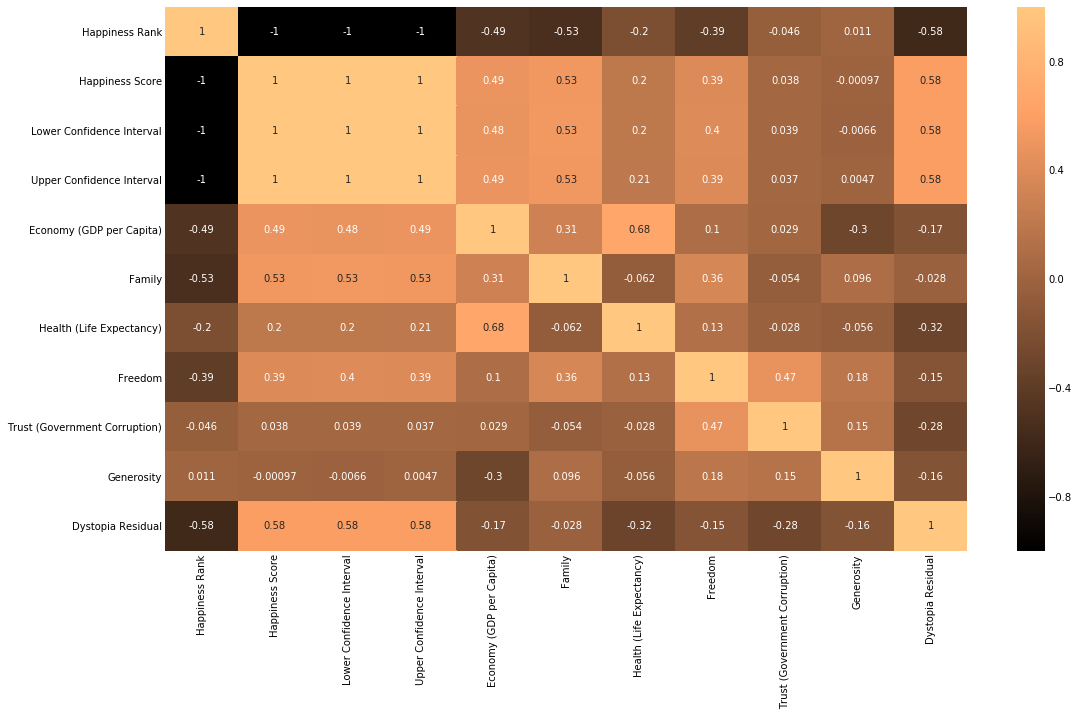

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Eastern Asia']
# d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'SouthEastern Asia']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Central and Eastern Europe']

d = pd.concat([d1, d2], axis = 0)
sns.heatmap(d.corr(), cmap = 'copper', annot = True)
plt.show()

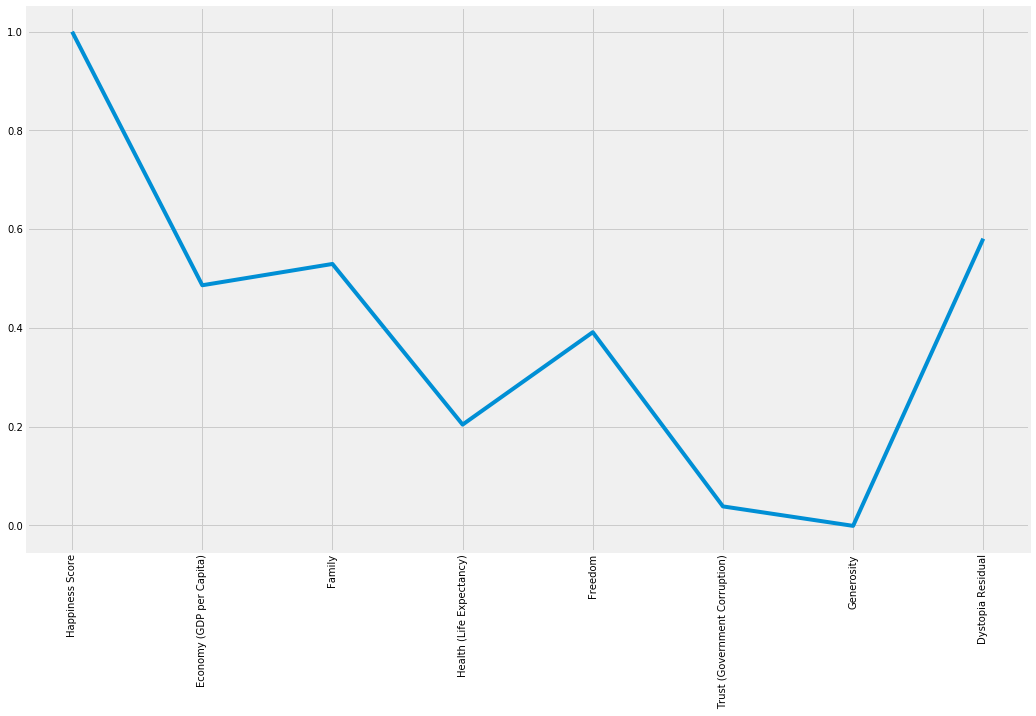

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Eastern Asia']
# d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'SouthEastern Asia']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Central and Eastern Europe']

new_data = pd.concat([d1, d2], axis = 0)
D = new_data.drop(['Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1)
d = D.corr()['Happiness Score']
d = pd.DataFrame(d)
row_names = d.index
row_names = pd.DataFrame(row_names)
plt.plot(row_names[0], d['Happiness Score'])
plt.xticks(rotation = 90)
plt.show()

As we move from regions with high Happiness Scores to regions with Medium Happiness Scores, the two major changes that are observed are, first increase in correlation between Happiness Score and Life Expectancy, Second decreation in the correlation of Happiness Score with all the other factors.

The increase in correlation between Life Expectancy and Happiness Score might be because the Life Expectancy has decreased to the point where the relation between Happiness Score and Life Expectancy is not random anymore.

To understand what caused a decrease in correlation between Happiness Score and other factors we need to dig a little deeper

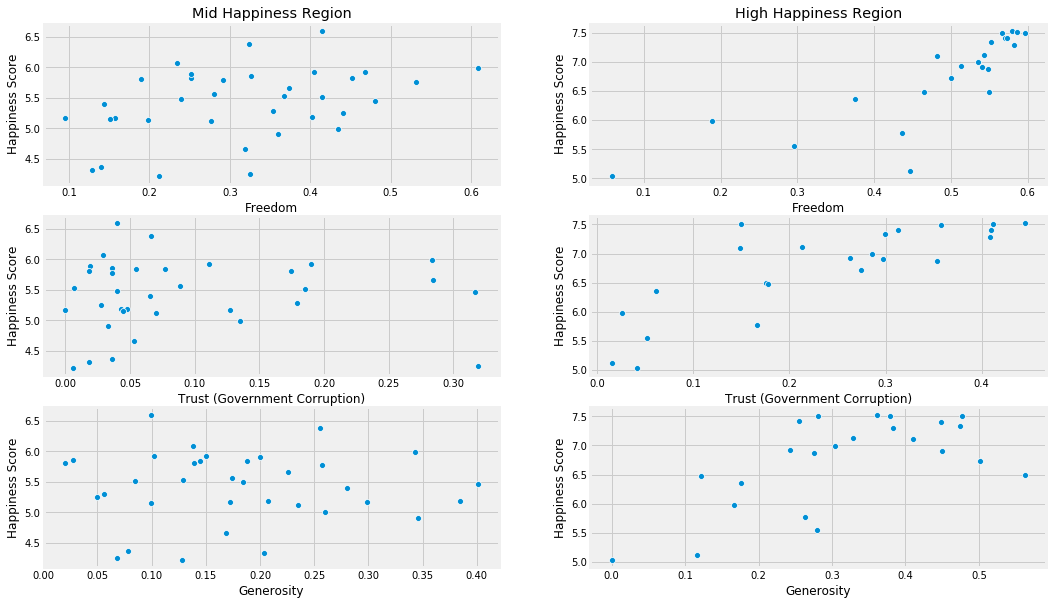

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Eastern Asia']
# d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'SouthEastern Asia']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Central and Eastern Europe']

d3 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Western Europe']
# d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'SouthEastern Asia']
d4 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'North America']

mid = pd.concat([d1, d2], axis = 0)
rich = pd.concat([d3, d4], axis = 0)
plt.subplot(3,2,1)
plt.title('Mid Happiness Region')
sns.scatterplot(mid['Freedom'], mid['Happiness Score'])
plt.subplot(3,2,2)
plt.title('High Happiness Region')
sns.scatterplot(rich['Freedom'], rich['Happiness Score'])
plt.subplot(3,2,3)
sns.scatterplot(mid['Trust (Government Corruption)'], mid['Happiness Score'])
plt.subplot(3,2,4)
sns.scatterplot(rich['Trust (Government Corruption)'], rich['Happiness Score'])
plt.subplot(3,2,5)
sns.scatterplot(mid['Generosity'], mid['Happiness Score'])
plt.subplot(3,2,6)
sns.scatterplot(rich['Generosity'], rich['Happiness Score'])

plt.show()

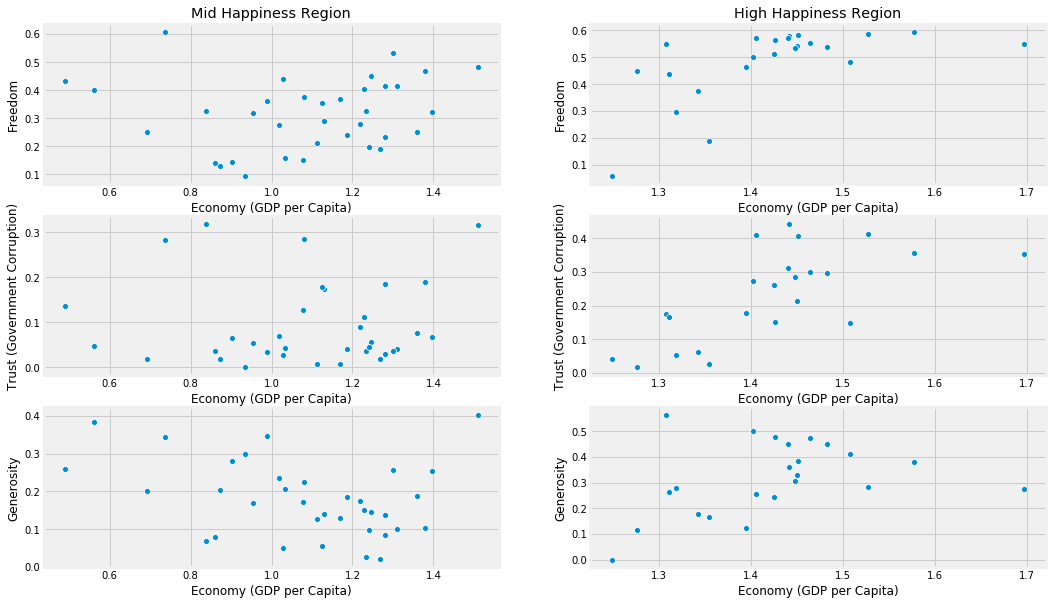

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Eastern Asia']
# d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'SouthEastern Asia']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Central and Eastern Europe']

d3 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Western Europe']
# d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'SouthEastern Asia']
d4 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'North America']

mid = pd.concat([d1, d2], axis = 0)
rich = pd.concat([d3, d4], axis = 0)
plt.subplot(3,2,1)
plt.title('Mid Happiness Region')
sns.scatterplot(mid['Economy (GDP per Capita)'], mid['Freedom'])
plt.subplot(3,2,2)
plt.title('High Happiness Region')
sns.scatterplot(rich['Economy (GDP per Capita)'], rich['Freedom'])
plt.subplot(3,2,3)
sns.scatterplot(mid['Economy (GDP per Capita)'], mid['Trust (Government Corruption)'])
plt.subplot(3,2,4)
sns.scatterplot(rich['Economy (GDP per Capita)'], rich['Trust (Government Corruption)'])
plt.subplot(3,2,5)
sns.scatterplot(mid['Economy (GDP per Capita)'], mid['Generosity'])
plt.subplot(3,2,6)
sns.scatterplot(rich['Economy (GDP per Capita)'], rich['Generosity'])

plt.show()

Data itself doesn't provide big clues to what might have lead to a decrease in correlation between Happiness Score and other factors but if I had to guess, I would blame high corruption and increase in the number of people who live in poverty as the prime reason for the decrease in correlation. High corruption not only slows down the development of the country/region but it also disturbs the wealth distribution of the country and distribution of benefits due to development among people and High poverty leads to an increase in the number of people who are affected the most by high corruption. So, both these factors combine to form a fraction of people who benefit very little from increase in factors like generosity and all, thus decreasing the correlation.

**Low Happiness Regions**

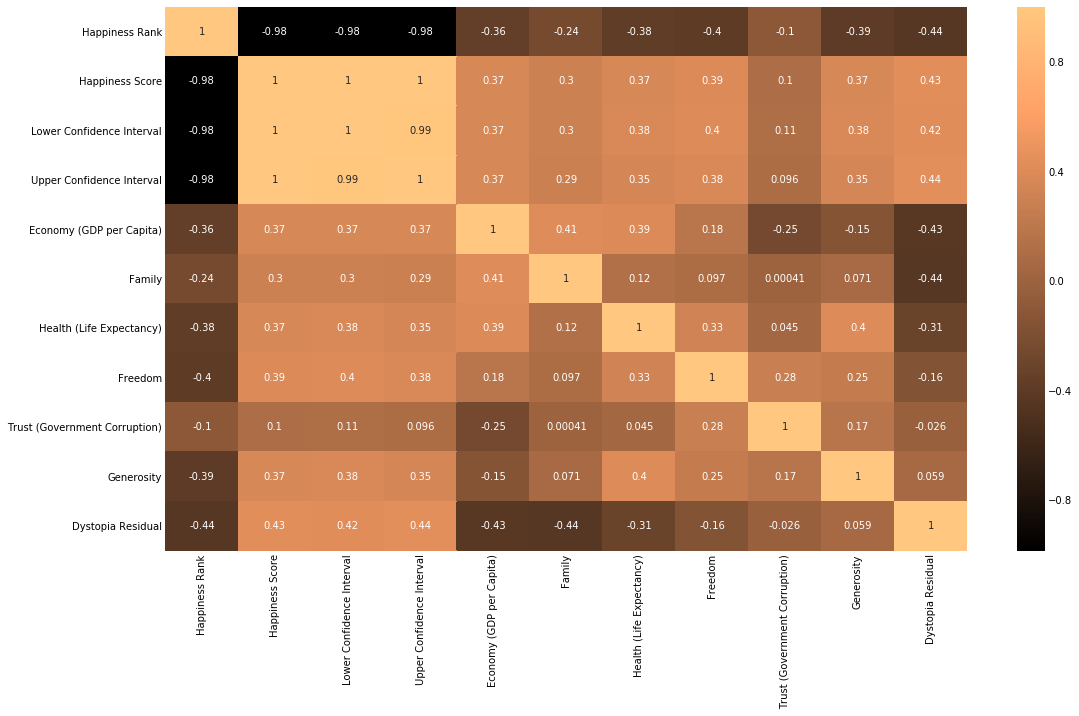

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Sub-Saharan Africa']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Southern Asia']
d = pd.concat([d1, d2], axis = 0)
sns.heatmap(d.corr(), cmap = 'copper', annot = True)
plt.show()

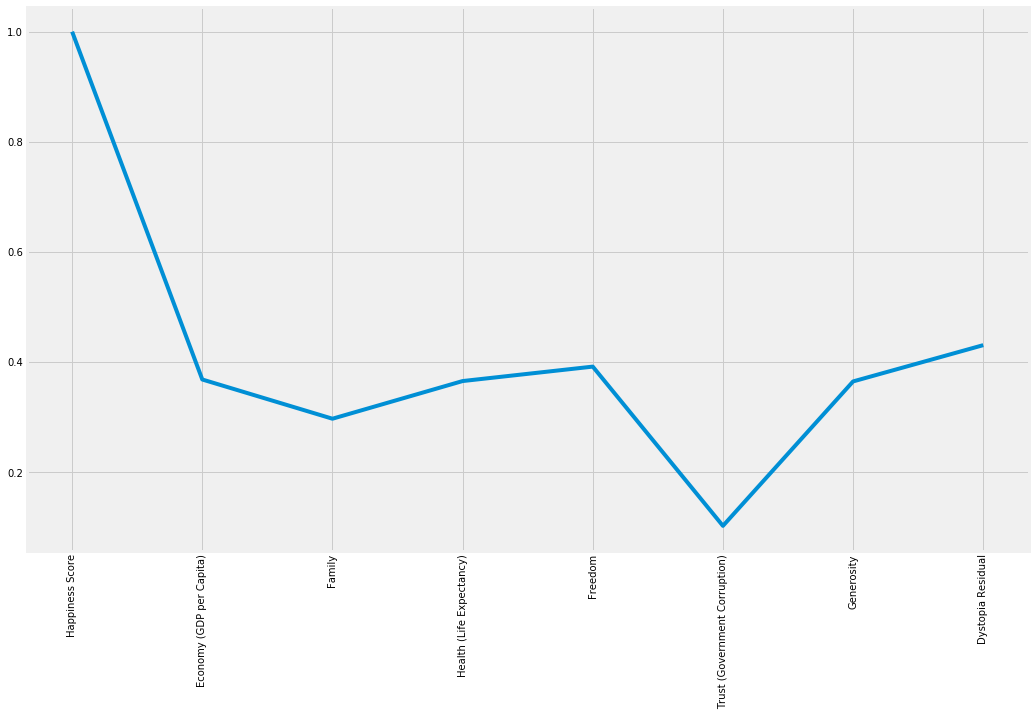

In [0]:
d1 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Sub-Saharan Africa']
d2 = d_2016.loc[lambda d_2016: d_2016['Region'] == 'Southern Asia']
new_data = pd.concat([d1, d2], axis = 0)
D = new_data.drop(['Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1)
d = D.corr()['Happiness Score']
d = pd.DataFrame(d)
row_names = d.index
row_names = pd.DataFrame(row_names)
plt.plot(row_names[0], d['Happiness Score'])
plt.xticks(rotation = 90)
plt.show()

Continuation of the phenomenon observed in the region with mid happiness can be observed here i.e the decrease in correlation between happiness and factors such as economy, family. Again this could be explained by increasing the proportion of the poor population and high corruption observed in these regions.

**Conclusion:**

So, to answer the question of what factors affects the happiness score in different regions and why is happiness score of different regions so different. I believe that major factors that have come out are economy, corruption in the government, the number of people that live in poverty and how the benefits of development are distributed amongst the people. While the former factor is easily quantifiable latter isn't, it depends on many factors like economy, corruption, history of the country, etc.

**If you liked it, kindly leave an Upvote.**